# Retail-Sales analysis

# context 

Idea: Exploratory Data Analysis (EDA) on Retail Sales Data
Description:
In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

# Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [3]:
df = pd.read_csv('retail_sales_dataset.csv')

In [4]:
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [5]:
#first five rows
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [6]:
#first five rows
print(df.tail())

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  


In [7]:
df.shape

(1000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [10]:
df.dropna(inplace= True)

In [11]:
df.shape

(1000, 9)

In [12]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(1000, 9)

# Descriptive statistics

In [18]:
desc_stats = df[['Total Amount', 'Quantity', 'Price per Unit']].describe()

In [19]:
print(desc_stats)

       Total Amount     Quantity  Price per Unit
count   1000.000000  1000.000000     1000.000000
mean     456.000000     2.514000      179.890000
std      559.997632     1.132734      189.681356
min       25.000000     1.000000       25.000000
25%       60.000000     1.000000       30.000000
50%      135.000000     3.000000       50.000000
75%      900.000000     4.000000      300.000000
max     2000.000000     4.000000      500.000000


# Customer Age and Gender Influence on Purchasing Behavior


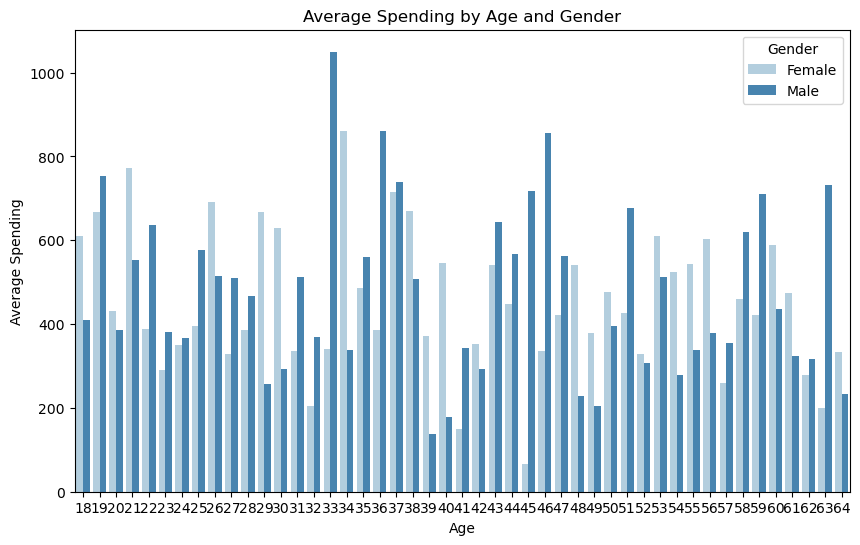

In [20]:
gender_age_group = df.groupby(['Gender', 'Age'])['Total Amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Total Amount', hue='Gender', data=gender_age_group, palette='Blues')
plt.title('Average Spending by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Average Spending')
plt.show()

# Time Series Sales Trends

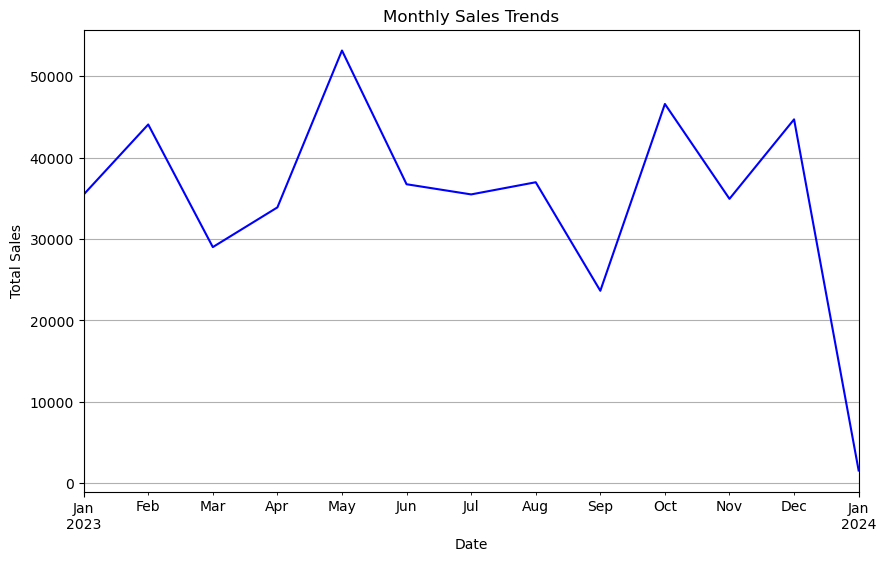

In [21]:
df.set_index('Date', inplace=True)
monthly_sales = df['Total Amount'].resample('M').sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# Most Appealing Product Categories

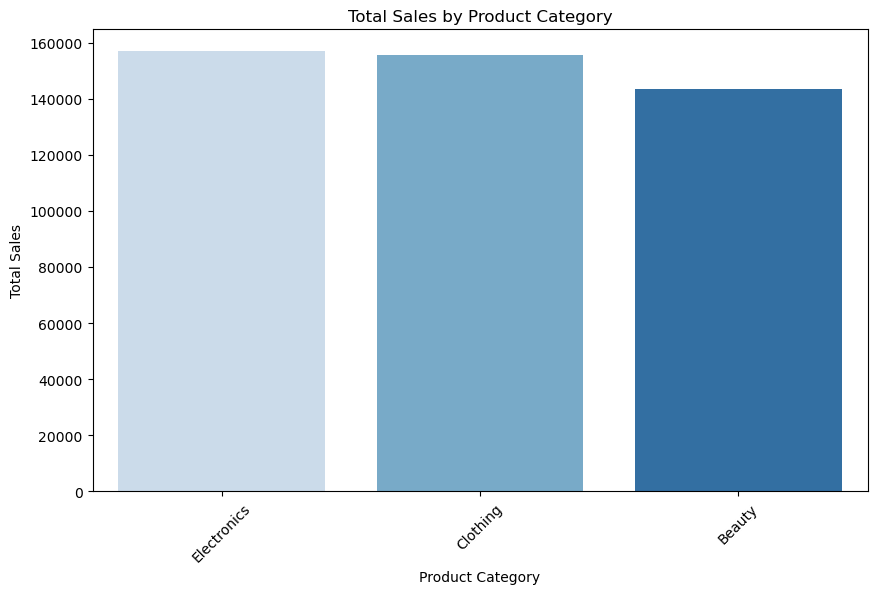

In [22]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()
category_sales.sort_values(by='Total Amount', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=category_sales, palette='Blues')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Relationship Between Age, Spending, and Product Preferences

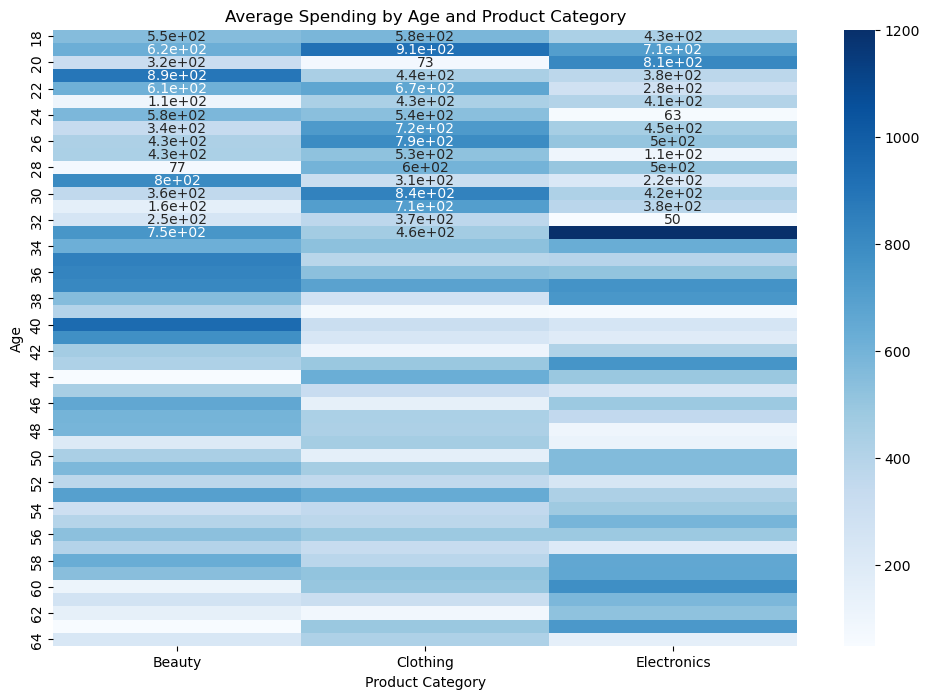

In [23]:
age_category_pivot = df.pivot_table(values='Total Amount', index='Age', columns='Product Category', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(age_category_pivot, annot=True, cmap='Blues')
plt.title('Average Spending by Age and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.show()

# Seasonal Shopping Habits

<Figure size 1000x600 with 0 Axes>

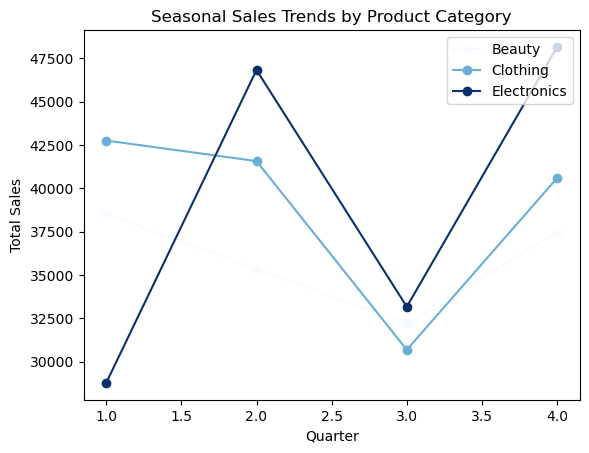

In [24]:
df['Quarter'] = df.index.quarter
seasonal_sales = df.groupby(['Quarter', 'Product Category'])['Total Amount'].sum().unstack()
plt.figure(figsize=(10, 6))
seasonal_sales.plot(kind='line', marker='o', cmap='Blues')
plt.title('Seasonal Sales Trends by Product Category')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(loc='upper right')
plt.show()

# Purchasing Behavior Based on Transaction Size

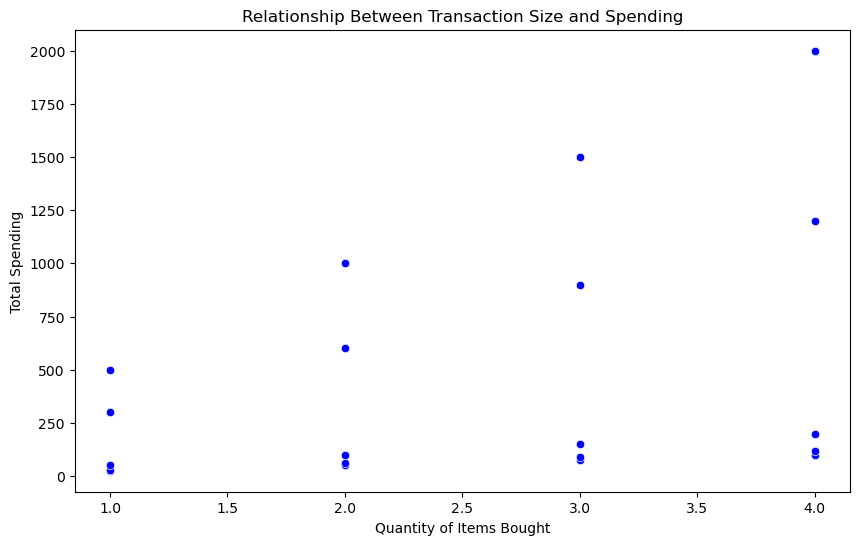

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total Amount', data=df, color='blue')
plt.title('Relationship Between Transaction Size and Spending')
plt.xlabel('Quantity of Items Bought')
plt.ylabel('Total Spending')
plt.show()

# Distribution of Product Prices Within Categories

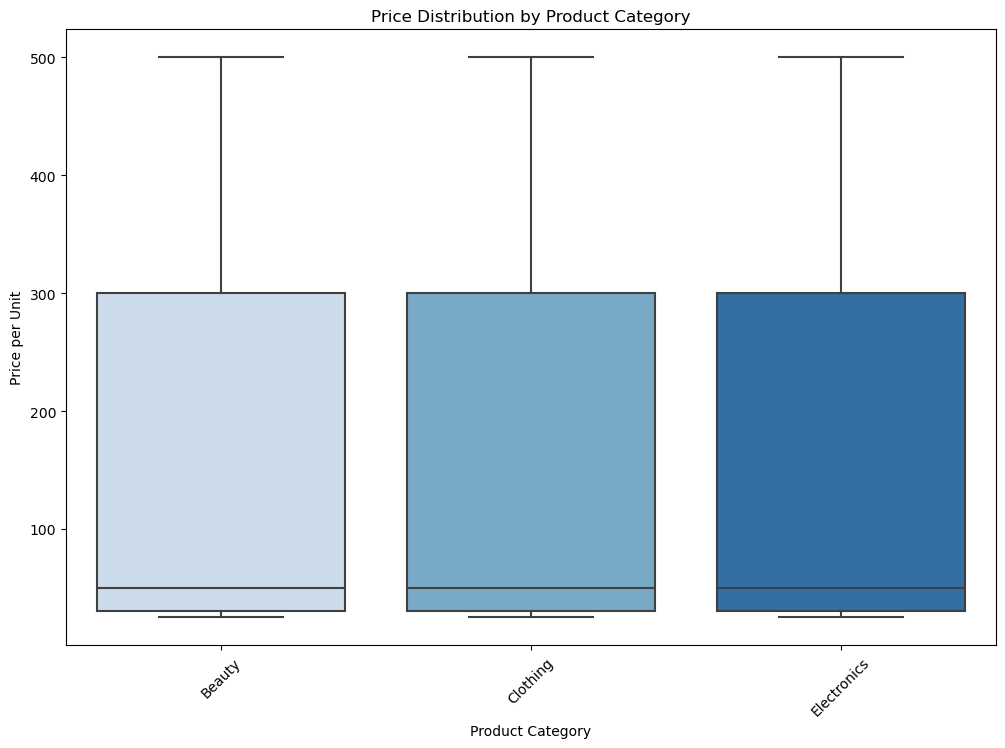

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product Category', y='Price per Unit', data=df, palette='Blues')
plt.title('Price Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')
plt.xticks(rotation=45)
plt.show()

# Customer Segmentation Based on Spending Habits

D:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


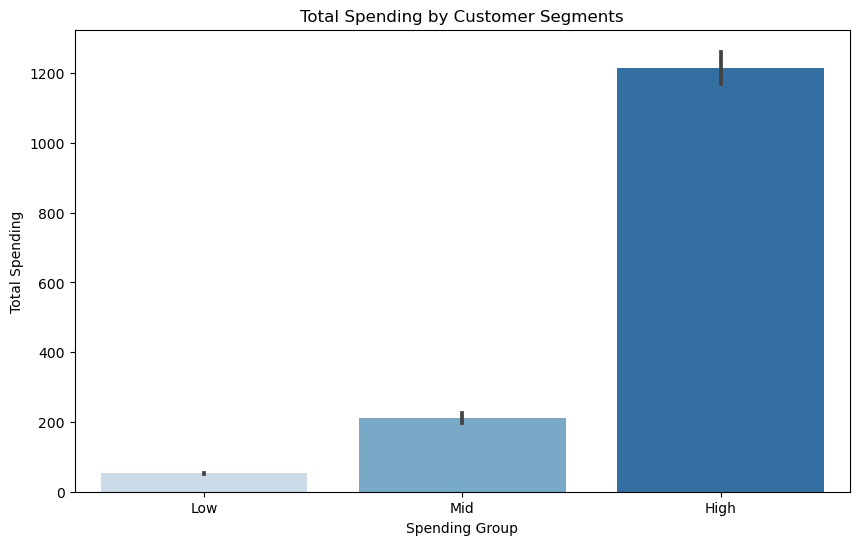

In [27]:
customer_spending = df.groupby('Customer ID')['Total Amount'].sum().reset_index()
customer_spending['Spending Group'] = pd.qcut(customer_spending['Total Amount'], q=3, labels=['Low', 'Mid', 'High'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Spending Group', y='Total Amount', data=customer_spending, palette='Blues')
plt.title('Total Spending by Customer Segments')
plt.xlabel('Spending Group')
plt.ylabel('Total Spending')
plt.show()

# Correlation Analysis Between Variables

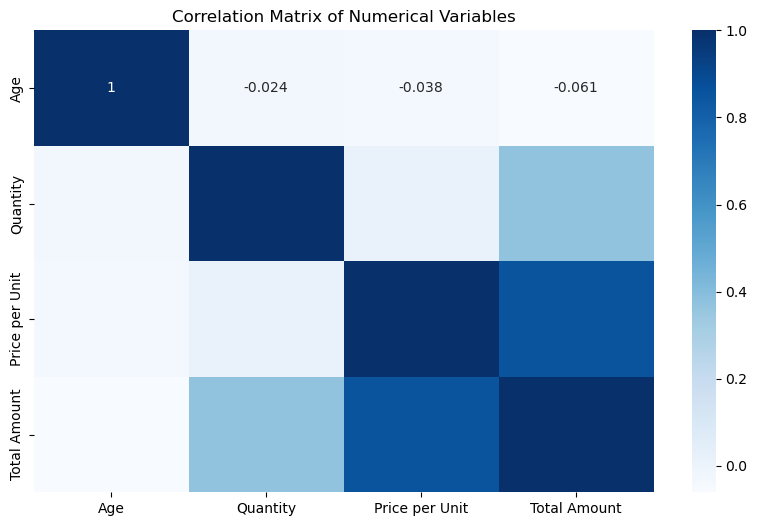

In [30]:
corr_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Revenue by Customer Lifetime Value (CLV)


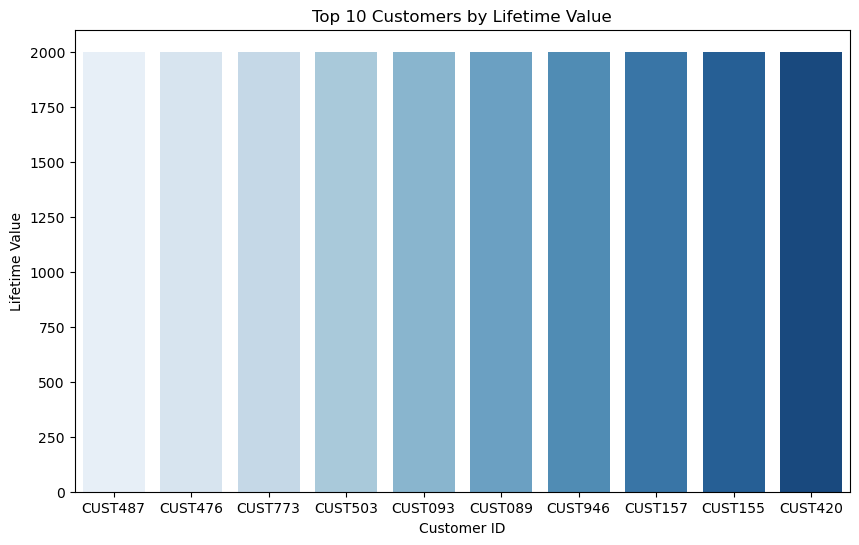

In [32]:
 customer_clv = df.groupby('Customer ID')['Total Amount'].sum().reset_index()
customer_clv.rename(columns={'Total Amount': 'Customer Lifetime Value'}, inplace=True)
customer_clv = customer_clv.sort_values(by='Customer Lifetime Value', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer ID', y='Customer Lifetime Value', data=customer_clv.head(10), palette='Blues')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Customer ID')
plt.ylabel('Lifetime Value')
plt.show()

# Product Price Sensitivity Analysis 

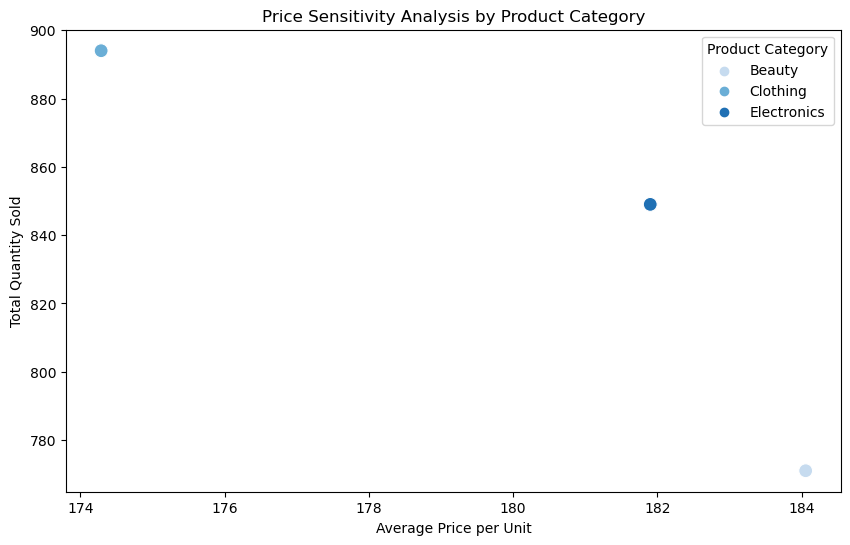

In [34]:
price_sensitivity = df.groupby('Product Category').agg({'Price per Unit': 'mean', 'Quantity': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Quantity', data=price_sensitivity, hue='Product Category', palette='Blues', s=100)
plt.title('Price Sensitivity Analysis by Product Category')
plt.xlabel('Average Price per Unit')
plt.ylabel('Total Quantity Sold')
plt.show()

#  Profitability Analysis (Margin Analysis by Category)

Cost per Unit column not found. Creating a dummy column.


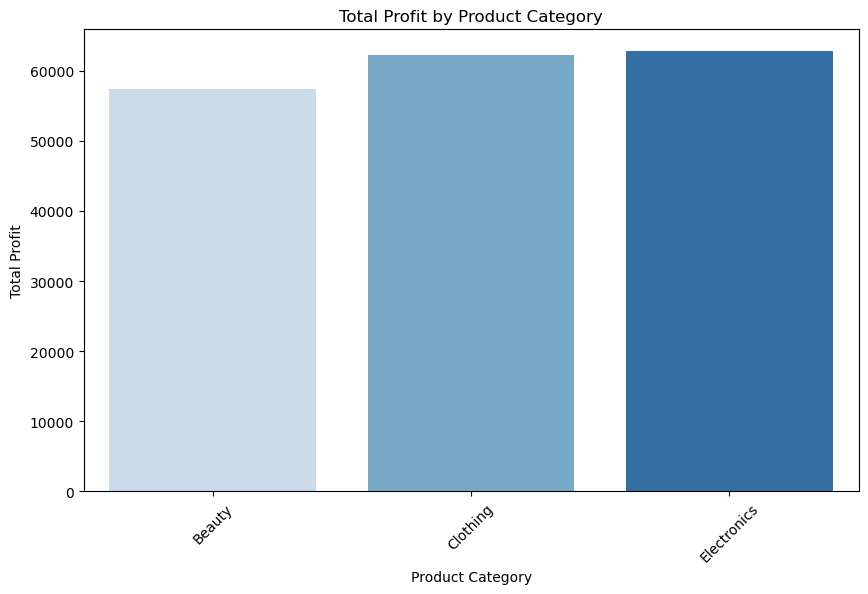

In [36]:
# Check if 'Cost per Unit' exists in the DataFrame
if 'Cost per Unit' not in df.columns:
    print("Cost per Unit column not found. Creating a dummy column.")
    df['Cost per Unit'] = df['Price per Unit'] * 0.6  # Example: 60% of price as cost

# Calculate Profit
df['Profit'] = (df['Price per Unit'] - df['Cost per Unit']) * df['Quantity']

# Group by Product Category to calculate total profit per category
category_profit = df.groupby('Product Category')['Profit'].sum().reset_index()

# Plot profitability by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Profit', data=category_profit, palette='Blues')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()
